# Unsupervised learning
# Clustering analysis & K-means

In [1]:
# change features 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tel= pd.read_csv('Datasets\Kaggle\churn-telec.csv')
tel

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [4]:
#pd.set_option('display.max_rows',None)
#tel

In [39]:
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [40]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [41]:
tel.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [42]:
#sns.jointplot(x='Total day calls',y='Customer service calls',data=train,kind='kde')
#sns.jointplot(x='Total day minutes',y='Churn',data=tel)

In [43]:
tel['Total day charge'].plot.hist(bins=30)

<Axes3D: xlabel='Calls', ylabel='Frequency', zlabel='Min'>

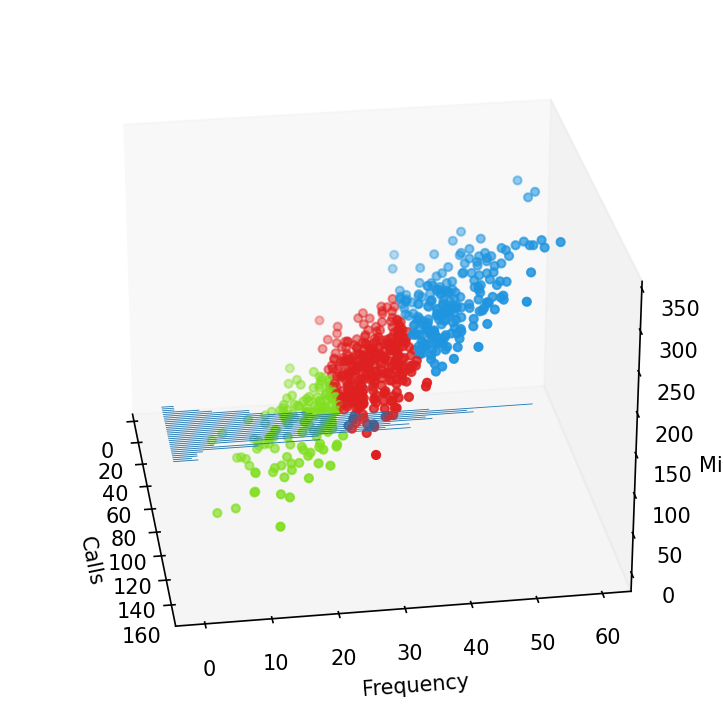

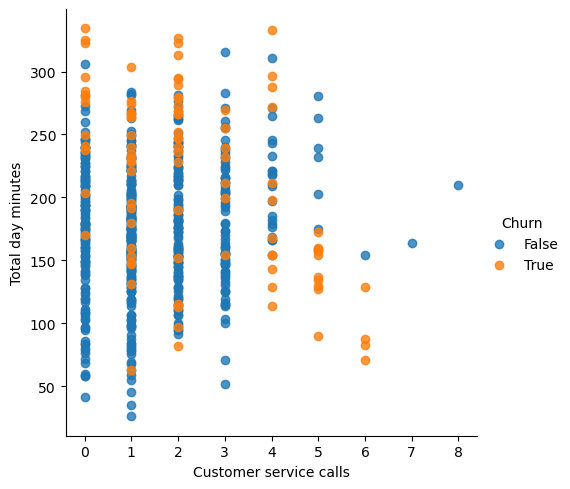

In [44]:
sns.lmplot(x='Customer service calls',y='Total day minutes',hue='Churn',data=tel,fit_reg=False,aspect=1)

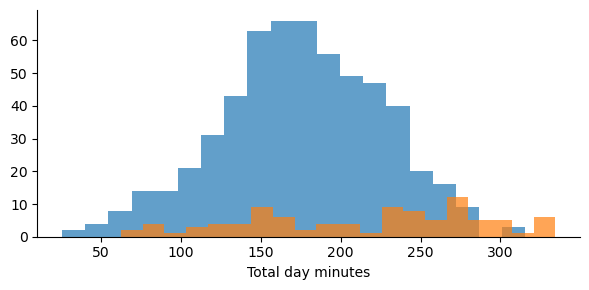

In [45]:
g = sns.FacetGrid(tel,hue='Churn',aspect=2)
g = g.map(plt.hist,'Total day minutes',bins=20,alpha=0.7)

In [46]:
tel.drop(['State','International plan','Voice mail plan'],axis=1,inplace=True)

In [47]:
from sklearn.cluster import KMeans

In [13]:
kmeans= KMeans(n_clusters=2)

In [48]:
tel.drop('Churn',axis=1,inplace=False)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [49]:
tel.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [50]:
kmeans.fit(tel)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [51]:
identified_clusters= kmeans.fit_predict(tel)
identified_clusters

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2,

In [52]:
kmeans.cluster_centers_

array([[1.00076628e+02, 4.15524904e+02, 8.37547893e+00, 1.36131801e+02,
        1.02475096e+02, 2.31431034e+01, 1.99007280e+02, 9.97624521e+01,
        1.69157854e+01, 2.14003831e+02, 9.87432950e+01, 9.63030651e+00,
        1.03114943e+01, 4.56321839e+00, 2.78475096e+00, 1.53639847e+00,
        7.27969349e-02],
       [1.00575163e+02, 5.10000000e+02, 8.58823529e+00, 1.91401307e+02,
        1.00424837e+02, 3.25385621e+01, 2.05676471e+02, 1.01274510e+02,
        1.74827451e+01, 1.96042484e+02, 1.01326797e+02, 8.82209150e+00,
        1.00418301e+01, 4.50326797e+00, 2.71176471e+00, 1.62091503e+00,
        1.69934641e-01],
       [1.07063241e+02, 4.12786561e+02, 8.33201581e+00, 2.20860079e+02,
        9.96600791e+01, 3.75468379e+01, 2.06437154e+02, 1.00731225e+02,
        1.75469960e+01, 1.87116996e+02, 1.00794466e+02, 8.42019763e+00,
        1.02818182e+01, 4.50592885e+00, 2.77667984e+00, 1.55731225e+00,
        1.97628458e-01]])

In [53]:
kmeans.labels_

array([2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2,

In [54]:
data_with_clusters = tel.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Cluster
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,2
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,2
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False,0
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False,0
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False,0
665,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False,0


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(tel['Churn'],kmeans.labels_))
print(confusion_matrix(tel['Churn'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.93      0.42      0.58       572
           1       0.17      0.27      0.21        95
           2       0.00      0.00      0.00         0

    accuracy                           0.40       667
   macro avg       0.37      0.23      0.26       667
weighted avg       0.82      0.40      0.53       667

[[242 127 203]
 [ 19  26  50]
 [  0   0   0]]


C:\Users\X1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#plt.scatter(data_with_clusters['Total day charge'],data_with_clusters['Total day calls'],c=data_with_clusters['Cluster'],cmap='rainbow')
#plt.xlim(0,180)
#plt.ylim(0,180)
#plt.xlabel('Total day charge')
#plt.ylabel('Cluster')

In [ ]:
kmeans.inertia_ # return SSE value (sum of squared error)

In [ ]:
#tel.drop(['Churn'],axis=1,inplace=True)

In [ ]:
# WCSS within cluster sum of squares

In [57]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(tel)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [58]:
wcss

[8623117.294798203,
 7236454.225137185,
 6454939.716703889,
 5842864.631649405,
 5335029.162500934,
 5020804.780096459]

Text(0, 0.5, 'Within Cluster Sum of Sqauers')

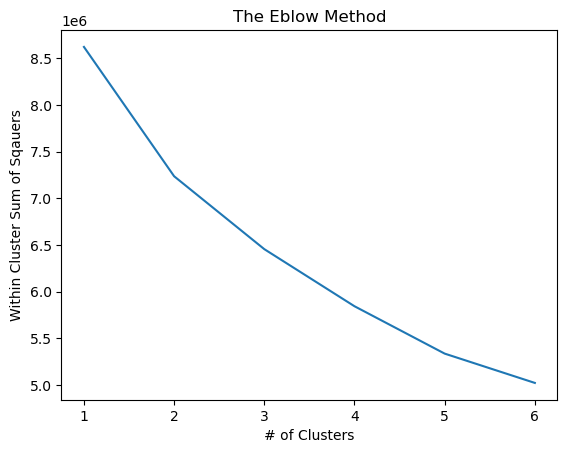

In [59]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Eblow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Within Cluster Sum of Sqauers')

In [60]:
c0= data_with_clusters[data_with_clusters['Cluster']==0]
c0

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Cluster
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,0
5,36,408,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False,0
8,10,408,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False,0
9,68,415,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,57,415,0,158.1,117,26.88,115.2,149,9.79,182.4,92,8.21,11.8,7,3.19,0,False,0
662,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False,0
663,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False,0
664,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False,0


In [61]:
c1= data_with_clusters[data_with_clusters['Cluster']==1]
c1

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Cluster
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,1
10,74,510,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False,1
13,128,510,29,179.3,104,30.48,225.9,86,19.20,323.0,78,14.54,8.6,7,2.32,0,False,1
19,36,510,29,281.4,102,47.84,202.2,76,17.19,187.2,113,8.42,9.0,6,2.43,2,False,1
28,6,510,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,133,510,0,295.0,141,50.15,223.6,101,19.01,229.4,109,10.32,12.9,4,3.48,2,True,1
654,120,510,27,128.5,115,21.85,163.7,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False,1
656,99,510,0,238.4,96,40.53,246.5,130,20.95,198.4,117,8.93,12.4,4,3.35,3,False,1
659,127,510,0,107.9,128,18.34,187.0,77,15.90,218.5,95,9.83,0.0,0,0.00,0,False,1


In [62]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=2, random_state=0)
tel['cluster'] = kmeans.fit_predict(tel[['Total day calls','Total day charge']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
tel['cen_x'] = tel.cluster.map({0:cen_x[0], 1:cen_x[1]})
tel['cen_y'] = tel.cluster.map({0:cen_y[0], 1:cen_y[1]})
# define and map colors
colors = ['#DF2020', '#81DF20']
tel['c'] = tel.cluster.map({0:colors[0], 1:colors[1]})



   

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


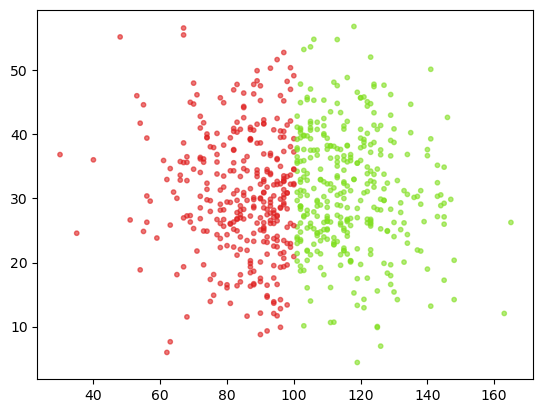

In [63]:
import matplotlib.pyplot as plt
plt.scatter(tel['Total day calls'], tel['Total day charge'], c=tel.c, alpha = 0.6, s=10)

In [64]:
kmeans.inertia_

160328.97176832025

In [ ]:
plt.scatter(tel['Total day calls'], tel['Total day charge'], c=tel['Churn'], alpha = 0.6, s=10)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


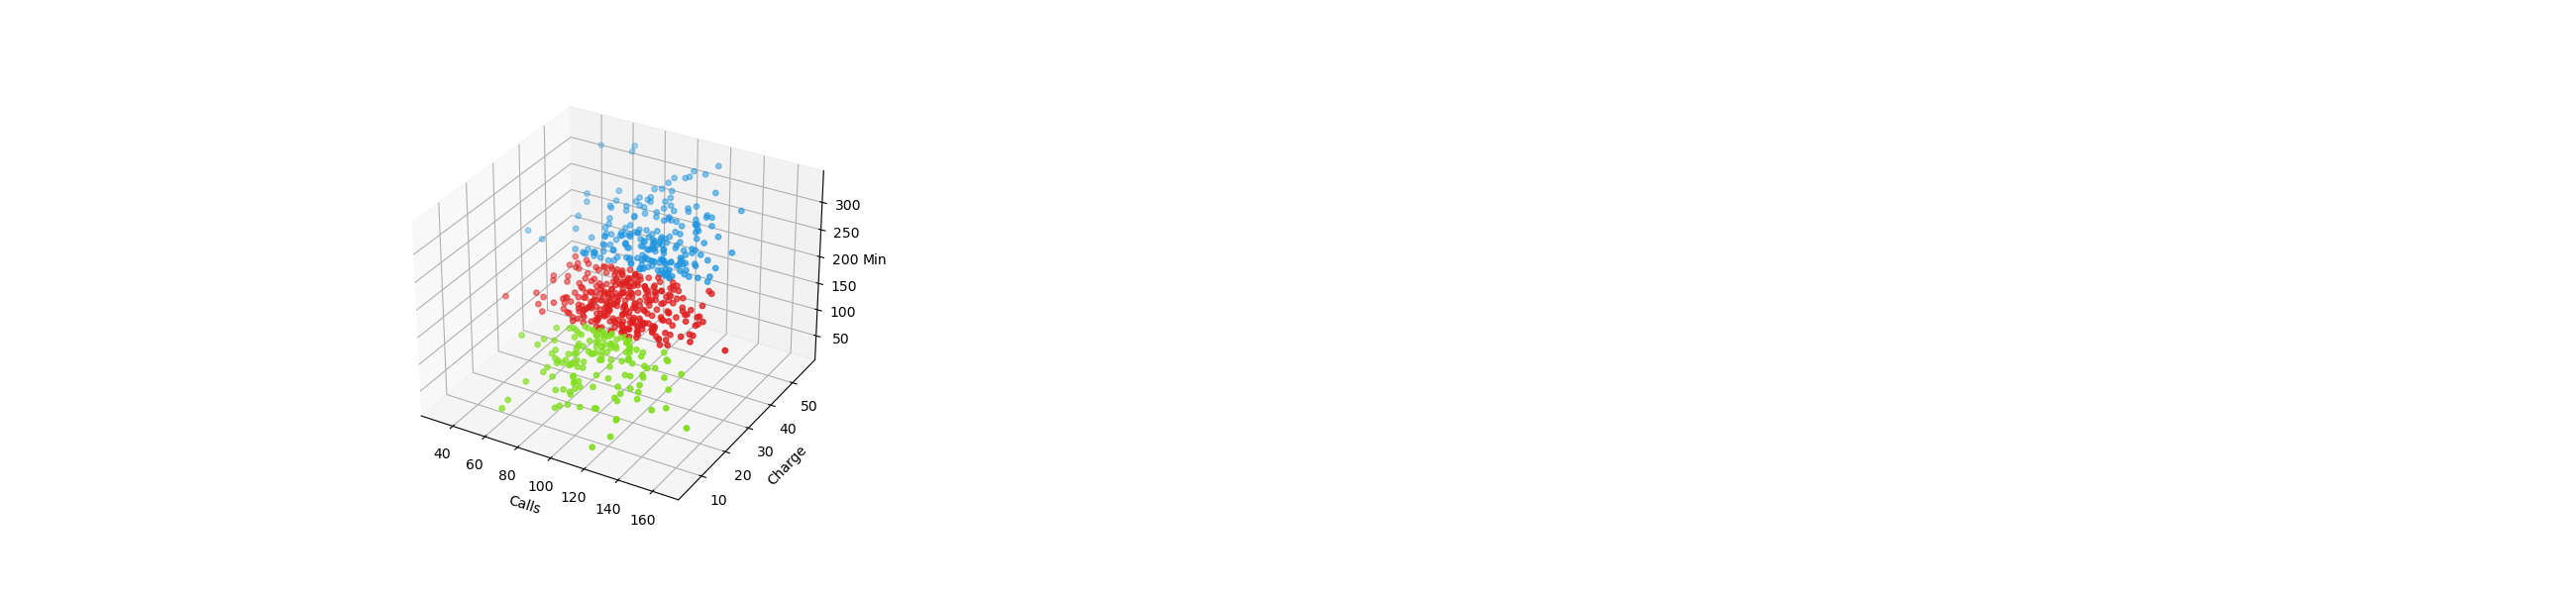

In [65]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
tel['cluster'] = kmeans.fit_predict(tel[['Total day calls','Total day charge','Total day minutes']])
tel['c'] = tel.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(tel['Total day calls'], tel['Total day charge'],tel['Total day minutes'], c=tel.c, s=15)
ax.set_xlabel('Calls')
ax.set_ylabel('Charge')
ax.set_zlabel('Min')
plt.show()
#%matplotlib inline

In [70]:
pip install ipympl

     ---------------------------------------- 0.0/511.6 kB ? eta -:--:--
      --------------------------------------- 10.2/511.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/511.6 kB 393.8 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/511.6 kB 469.7 kB/s eta 0:00:01
     ------ ------------------------------ 92.2/511.6 kB 585.1 kB/s eta 0:00:01
     ---------- ------------------------- 143.4/511.6 kB 610.6 kB/s eta 0:00:01
     ---------- ------------------------- 153.6/511.6 kB 612.6 kB/s eta 0:00:01
     -------------- --------------------- 204.8/511.6 kB 623.6 kB/s eta 0:00:01
     -------------------- --------------- 286.7/511.6 kB 770.1 kB/s eta 0:00:01
     ------------------------- ---------- 368.6/511.6 kB 849.3 kB/s eta 0:00:01
     ------------------------------ ----- 430.1/511.6 kB 897.1 kB/s eta 0:00:01
     ------------------------------------ 511.6/511.6 kB 973.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updat

# Classification

In [5]:
from sklearn.model_selection import train_test_split
tel.drop(['State','International plan','Voice mail plan'],axis=1,inplace=True)
X=tel.drop('Churn',axis=1)
y=tel['Churn']

In [6]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=101)

In [7]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
predictions=logmodel.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       False       0.88      0.98      0.92       230
        True       0.50      0.14      0.21        37

    accuracy                           0.86       267
   macro avg       0.69      0.56      0.57       267
weighted avg       0.82      0.86      0.83       267

[[225   5]
 [ 32   5]]


In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
pred=dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94       230
        True       0.63      0.59      0.61        37

    accuracy                           0.90       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.89      0.90      0.89       267

[[217  13]
 [ 15  22]]


In [13]:
pip install plot_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 550.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.6 MB 751.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/10.6 MB 711.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.6 MB 1.0 MB/s eta 0:00:11
   - -------------------------------------- 0.3/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/10.6 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/10.6 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/10.6 MB 1.4 MB/s eta 0:00:07
   -- ---

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\X1\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [79]:
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [80]:
k=30
kf=KFold(n_splits=k,random_state=None)
dtree2= DecisionTreeClassifier()
dtree2.fit(X_train,y_train)
result= cross_val_score(dtree2,X,y,cv=kf)
print("Avg acuracy: {}".format(result.mean()))

Avg acuracy: 0.881752305665349


In [84]:
new_data = pd.DataFrame({'Account length':[117],'Area code' :[408], 'Number vmail messages' :[0],'Total day minutes':184.5,'Total day calls' :[97],'Total day charge' :[31.37],'Total eve minutes':[351.6],'Total eve calls':[80],'Total eve charge' :[29.89] ,'Total night minutes':[215.8],'Total night calls' :[90] ,'Total night charge' :[9.71], 'Total intl minutes' :[8.7], 'Total intl calls' :[4], 'Total intl charge' :[2.35], 'Customer service calls' :[1]})
new_data = new_data[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']]
new_data

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1


In [85]:
new_data.rename(index={0: 'Cust 1'})
predictionsdf=pd.DataFrame({'Predictions' :pred})
joined= new_data.join(predictionsdf)
joined.rename(index={0: 'Cus1 '})

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Predictions
Cus1,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False


In [86]:
tel_test= pd.read_csv('Datasets\Kaggle\churn-telec-test.csv')
tel_test

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,68,415,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3
2,74,510,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2
3,85,415,0,235.8,109,40.09,157.2,94,13.36,188.2,99,8.47,12.0,3,3.24,0
4,64,408,27,182.1,91,30.96,169.7,98,14.42,164.7,86,7.41,10.6,5,2.86,2
5,25,415,0,119.3,87,20.28,211.5,101,17.98,268.9,86,12.10,10.5,4,2.84,3
6,127,415,0,202.1,103,34.36,229.4,86,19.50,195.2,113,8.78,11.5,3,3.11,2
7,208,510,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2
8,68,415,29,195.5,113,33.24,171.6,96,14.59,204.0,85,9.18,13.5,9,3.65,1


In [87]:
tel_test.rename(index={0: 'Cust 1', 1: 'Cust 2', 2: 'Cust 3', 3: 'Cust 4', 4: 'Cust 5', 5: 'Cust 6', 6: 'Cust 7', 7: 'Cust 8', 8: 'Cust 9', 9: 'Cust 10'})

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Cust 1,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
Cust 2,68,415,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3
Cust 3,74,510,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2
Cust 4,85,415,0,235.8,109,40.09,157.2,94,13.36,188.2,99,8.47,12.0,3,3.24,0
Cust 5,64,408,27,182.1,91,30.96,169.7,98,14.42,164.7,86,7.41,10.6,5,2.86,2
Cust 6,25,415,0,119.3,87,20.28,211.5,101,17.98,268.9,86,12.10,10.5,4,2.84,3
Cust 7,127,415,0,202.1,103,34.36,229.4,86,19.50,195.2,113,8.78,11.5,3,3.11,2
Cust 8,208,510,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2
Cust 9,68,415,29,195.5,113,33.24,171.6,96,14.59,204.0,85,9.18,13.5,9,3.65,1


In [88]:
predictionsdf=pd.DataFrame({'Predictions' :pred})
joined= tel_test.join(predictionsdf)
joined.rename(index={0: 'Cust 1', 1: 'Cust 2', 2: 'Cust 3', 3: 'Cust 4', 4: 'Cust 5', 5: 'Cust 6', 6: 'Cust 7', 7: 'Cust 8', 8: 'Cust 9', 9: 'Cust 10'})

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Predictions
Cust 1,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
Cust 2,68,415,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False
Cust 3,74,510,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False
Cust 4,85,415,0,235.8,109,40.09,157.2,94,13.36,188.2,99,8.47,12.0,3,3.24,0,False
Cust 5,64,408,27,182.1,91,30.96,169.7,98,14.42,164.7,86,7.41,10.6,5,2.86,2,False
Cust 6,25,415,0,119.3,87,20.28,211.5,101,17.98,268.9,86,12.10,10.5,4,2.84,3,False
Cust 7,127,415,0,202.1,103,34.36,229.4,86,19.50,195.2,113,8.78,11.5,3,3.11,2,True
Cust 8,208,510,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,False
Cust 9,68,415,29,195.5,113,33.24,171.6,96,14.59,204.0,85,9.18,13.5,9,3.65,1,True
